Project: Innerwear Products on Amazon Analysis

Team members: Yue 'Alex' Fu, Jiameizi Yao, Camila Pareja, Tianyue Wang

Date: Winter 2020

# Part 1. Descriptive Analysis
## 1.1 Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('amazon_com.csv')
df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,$32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,$36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan


In [3]:
# get the number of rows and colunms
df.shape

(31612, 14)

In [4]:
# check if there is missing value
df.isnull().sum()

product_name        0
mrp                 0
price               0
pdp_url             0
brand_name          0
product_category    0
retailer            0
description         0
rating              0
review_count        0
style_attributes    0
total_sizes         0
available_size      0
color               0
dtype: int64

In [5]:
#check the brands
brand_count = df.groupby('brand_name')['product_name'].count().sort_values(0, ascending = False)
brand_count

brand_name
Wacoal                                                                                                 20088
Calvin-Klein                                                                                            7372
b-temptd                                                                                                3490
Hanky-Panky                                                                                              582
Victorias-Secret                                                                                          67
s                                                                                                          3
ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal               2
ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d          1
ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein        1
Sexy-Hai

In [6]:
#check the color
color_count = df.groupby('color')['product_name'].count().sort_values(0, ascending = False)
color_count.head(10)
# there are small, medium, and large which shouldn't be here.

color
Black             5664
Naturally Nude    2825
Ivory             1778
White             1480
Cappuccino        1168
Toast             1098
Bare               954
Large              857
Small              845
Medium             838
Name: product_name, dtype: int64

In [7]:
#check the data type
df.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count          int64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

# Part 2. Data Preprocessing

## 2.1 Fixing abnormal brand name
### Since there are some abnormal for the brand name, we want to look the details of them.

In [8]:
#split the abnormal products and normal products
brandname = brand_count[(brand_count[:] > 50)].index
nor_product = df[df['brand_name'].isin(brandname)]

ab_brandname = brand_count[(brand_count[:] < 50)].index
ab_product = df[df['brand_name'].isin(ab_brandname)]


In [9]:
#use the first word in product_name to replace the error brand_name
ab_product['brand_name']=[i[0] for i in 
                          ab_product['product_name'].str.split(' ')]

#replace Calvin by Calvin-Klein
ab_product['brand_name']=ab_product['brand_name'].replace('Calvin','Calvin-Klein')
ab_product['brand_name']=ab_product['brand_name'].replace("b.tempt'd",'b-temptd')


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [10]:
# combine the fixed products with the normal products
df = pd.concat([nor_product, ab_product])

#check the brands again
brand_count = df.groupby('brand_name')['product_name'].count().sort_values(0, ascending = False)
brand_count

brand_name
Wacoal              20096
Calvin-Klein         7373
b-temptd             3494
Hanky-Panky           582
Victorias-Secret       67
Name: product_name, dtype: int64

## 2.2 Fixing abnormal color
### Since there are some abnormal for the color, we want to look the details of them.

In [11]:
size_color = ['Small','Medium','Large']

index = 0
for i in df['color']:
    if i in size_color:
        df['available_size'][index] = df['available_size'][index] + ' , '+ i
        df['color'][index] = np.nan
    index=index+1

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
#check the missing value again
df.isnull().sum()

product_name           0
mrp                    0
price                  0
pdp_url                0
brand_name             0
product_category       0
retailer               0
description            0
rating                 0
review_count           0
style_attributes       0
total_sizes            0
available_size         0
color               2540
dtype: int64

## 2.3 Impute the missing value

In [13]:
df['color'].value_counts()

Black                       5293
Naturally Nude              2649
Ivory                       1662
White                       1369
Cappuccino                  1079
                            ... 
Black/White/Bare/Coastal       1
Lotus Gypset                   1
Undone                         1
Potent Purple                  1
Black/White                    1
Name: color, Length: 260, dtype: int64

In [14]:
df['color']= df['color'].fillna(df['color'].value_counts().index[0], inplace=False)

In [15]:
df['color'].value_counts()

Black                       7833
Naturally Nude              2649
Ivory                       1662
White                       1369
Cappuccino                  1079
                            ... 
Black/White/Bare/Coastal       1
Lotus Gypset                   1
Undone                         1
Potent Purple                  1
Black/White                    1
Name: color, Length: 260, dtype: int64

## 2.4 Adjust the data type

In [16]:
#check the data type
df.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count          int64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [17]:
#change the currency variable to numeric
df[df.columns[1:3]] = df[df.columns[1:3]].replace('[\$,]', '', regex=True).astype(float) 

df.dtypes

product_name         object
mrp                 float64
price               float64
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count          int64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

## 2.5 Transforming variables
### 2.5.1 For sizes

In [18]:
# count the number of total size
df['total_sizes_num']=[len(i) for i in 
                          df['total_sizes'].str.split(',')]

# count the number of available size
df['available_size_num']=[len(i) for i in 
                          df['available_size'].str.split(',')]

# check the difference between the two new columns
df['diff_size_num'] = df['total_sizes_num'] - df['available_size_num']

df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,total_sizes_num,available_size_num,diff_size_num
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare,22,19,3
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large , Large",Black,4,4,0
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black,18,17,1
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large , Large",Black,4,4,0
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan,36,34,2


### 2.5.2 For Description and Style_attributes
#### 1. Prepare for checking the frequecies of the words in one column.

In [19]:
def word_count(text):
    import re
    punctuation = '!,&%;=:|?"\''
    text = re.sub(r'[\[\]{}]+'.format(punctuation), '',text)
    
    # remove stop words
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize 
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text.lower())
    list_of_words = [w for w in word_tokens if not w in stop_words]
    
    # print(list_of_words)
    # create a null dictionary
    freq_words = {}
    freq_words = dict.fromkeys(set(list_of_words), None)
    # print(num_words)
    
    # input the frequency of words
    for i in freq_words:
        freq_words[i] = list_of_words.count(i)
    return freq_words

In [20]:
def coltext_freq(dataset, column):
    # combine the whole column
    desc_combine = dataset.groupby('retailer')[column].apply(' '.join).reset_index()

    # extract the text
    desc_text = desc_combine[column][0]

    # count the number of words and put them in a dictionary
    desc_freq = word_count(desc_text)

    # sort the dictionary by frequency/value
    import operator
    desc_sort = sorted(desc_freq.items(), key=operator.itemgetter(1),reverse=True)

    #change the list to dataframe
    desc_freq_sort = pd.DataFrame(desc_sort, columns = ['word','frequency'])

    #calculate the possibility for existing in the description
    desc_freq_sort['possibility']= desc_freq_sort['frequency']/len(dataset)
    return desc_freq_sort

#### 2. Check the frequency of words in description and plot a wordcloud

In [21]:
# run the code for the whole dataset and each brand
df_desc_freq = coltext_freq(df,'description')
wc_desc_freq = coltext_freq(df[(df['brand_name'] == brandname[0])],'description')
ck_desc_freq = coltext_freq(df[(df['brand_name'] == brandname[1])],'description')
bt_desc_freq = coltext_freq(df[(df['brand_name'] == brandname[2])],'description')
hp_desc_freq = coltext_freq(df[(df['brand_name'] == brandname[3])],'description')
vs_desc_freq = coltext_freq(df[(df['brand_name'] == brandname[4])],'description')

#combine them to one dataset
desc_freq_dic = {'whole dataset': df_desc_freq, brandname[0]: wc_desc_freq, brandname[1]: ck_desc_freq,
         brandname[2]: bt_desc_freq, brandname[3]: hp_desc_freq, brandname[4]: vs_desc_freq}
all_desc_freq = pd.concat(desc_freq_dic,axis=1)

all_desc_freq.to_csv('description_frequency.csv', index = True)

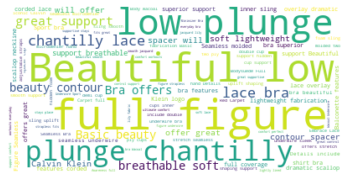

In [22]:
#plot a wordcloud

#!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combine the whole column
text_prep = df.groupby('retailer')['description'].apply(' '.join).reset_index()
# extract the text
text_desc_prep = text_prep['description'][0]


#ower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_desc_prep)
plt.figure()
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3. Check the frequency of words in style_attributes

In [23]:
# run the code for the whole dataset and each brand
df_styl_freq = coltext_freq(df,'style_attributes')
wc_styl_freq = coltext_freq(df[(df['brand_name'] == brandname[0])],'style_attributes')
ck_styl_freq = coltext_freq(df[(df['brand_name'] == brandname[1])],'style_attributes')
bt_styl_freq = coltext_freq(df[(df['brand_name'] == brandname[2])],'style_attributes')
hp_styl_freq = coltext_freq(df[(df['brand_name'] == brandname[3])],'style_attributes')
vs_styl_freq = coltext_freq(df[(df['brand_name'] == brandname[4])],'style_attributes')

#combine them to one dataset
styl_freq_dic = {'whole dataset': df_styl_freq, brandname[0]: wc_styl_freq, brandname[1]: ck_styl_freq,
         brandname[2]: bt_styl_freq, brandname[3]: hp_styl_freq, brandname[4]: vs_styl_freq}
all_styl_freq = pd.concat(styl_freq_dic,axis=1)

all_styl_freq.to_csv('style_attributes_frequency.csv', index = True)

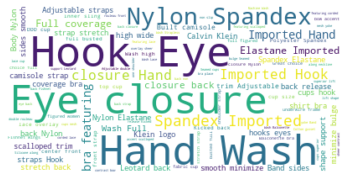

In [24]:
#plot a wordcloud

# combine the whole column
text_prep = df.groupby('retailer')['style_attributes'].apply(' '.join).reset_index()
# extract the text
text_desc_styl = text_prep['style_attributes'][0]


#ower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_desc_styl)
plt.figure()
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 4. Plot histogram for the whole dataset

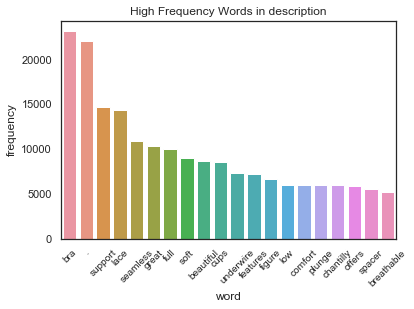

In [25]:
sns.set(style = 'white')
ax = sns.barplot(x=df_desc_freq['word'].head(20), 
                 y=df_desc_freq['frequency'].head(20)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize='small')
plt.title('High Frequency Words in description')
plt.show()

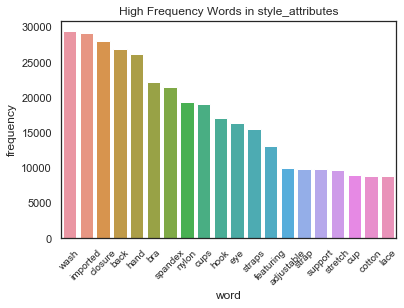

In [26]:
sns.set(style = 'white')
ax = sns.barplot(x=df_styl_freq['word'].head(20), 
                 y=df_styl_freq['frequency'].head(20)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize='small')
plt.title('High Frequency Words in style_attributes')
plt.show()

#### 5. Pick the highest typical words for the industry and define as the key words for two columns


In [27]:
# # extract for the top 40 and delete the unnecessary 
key_words_desc = list(set(all_desc_freq['whole dataset']['word'][0:40])
                      -set(['bra','klein','calvin','logo','cups','cup','wacoal']))

key_words_styl = list(set(all_styl_freq['whole dataset']['word'][0:40])
                      -set(['logo','band','fabric','wash','hand','closure','minimize','full','eye','hook-and-eye','82']))

#### 6. Create dummy variables which are the key words.

In [28]:
def get_dummy(new_var, dataset, colomn):
    dataset[colomn+'_'+new_var] = [1 if i else 0 for i in 
                           dataset[colomn].str.find(new_var)>0] 
    return dataset

In [29]:
for i in key_words_desc:
    df = get_dummy(i,df,'description')

for i in key_words_styl:
    df = get_dummy(i,df,'style_attributes')
    
df.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,...,style_attributes_cotton,style_attributes_lace,style_attributes_underwire,style_attributes_adjustable,style_attributes_full-coverage,style_attributes_trim,style_attributes_bra,style_attributes_straps,style_attributes_support,style_attributes_elastane
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,...,0,0,0,0,0,0,0,0,0,0
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,...,1,0,0,0,0,0,0,0,0,0
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,...,0,0,1,1,0,1,1,1,0,0
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,...,0,1,0,0,0,0,0,0,0,0
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,...,0,1,0,0,0,0,1,1,0,0


### 2.5.3 For product_category

In [30]:
# Create dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df['product_category'], drop_first=True) 

# Drops categorical variables from the df
df = df.drop('product_category', axis = 1) 

# Adds the newly created dummy variables instead
df = pd.concat([df, dummy_cat_df], axis = 1) 

### 2.5.4 For rating

In [31]:
df['rating_level'] = [1 if i else 0 for i in 
                           df['rating']>4] 
df.head()

,product_name,mrp,price,pdp_url,brand_name,retailer,description,rating,review_count,style_attributes,...,style_attributes_underwire,style_attributes_adjustable,style_attributes_full-coverage,style_attributes_trim,style_attributes_bra,style_attributes_straps,style_attributes_support,style_attributes_elastane,Panties,rating_level
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...",...,0,0,0,0,0,0,0,0,0,1
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...",...,0,0,0,0,0,0,0,0,1,1
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...",...,1,1,0,1,1,1,0,0,0,1
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...",...,0,0,0,0,0,0,0,0,1,1
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...",...,0,0,0,0,1,1,0,0,0,1


### 2.5.5 Create a unique ID for each product

In [32]:
df['ID'] = df.index+1
df.head()

,product_name,mrp,price,pdp_url,brand_name,retailer,description,rating,review_count,style_attributes,...,style_attributes_adjustable,style_attributes_full-coverage,style_attributes_trim,style_attributes_bra,style_attributes_straps,style_attributes_support,style_attributes_elastane,Panties,rating_level,ID
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.0,32.4,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...",...,0,0,0,0,0,0,0,0,1,1
1,Wacoal Embrace Lace Bikini Panty,27.0,27.0,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...",...,0,0,0,0,0,0,0,1,1,2
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.0,65.0,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...",...,1,0,1,1,1,0,0,0,1,3
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.0,36.0,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...",...,0,0,0,0,0,0,0,1,1,4
4,Wacoal Women's Red Carpet Strapless Bra,65.0,65.0,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...",...,0,0,0,1,1,0,0,0,1,5


## 2.6 Drop variables

### 2.6.1 Drop useless variables

In [33]:
# product_name, drop URL, retailer, description, style_attributes, total_sizes, available_size
df = df.drop(['product_name','pdp_url','retailer','description', 'style_attributes','total_sizes','available_size'],axis =1)


### 2.6.2 Drop variables based on cardinality

In [34]:
# check variables with zero cardinality
df_new = df
zero_cardinality = [] 
for i in df.columns: 
    if len(df[i].value_counts().index) == 1: 
        zero_cardinality.append(i)
df_new = df_new.drop(zero_cardinality, axis =1)

# check variables with high cardinality
high_cardinality = [] 
for i in df.columns[df.dtypes==object]: 
    if len(df[i].value_counts().index) > 200: 
        high_cardinality.append(i)
df_new = df_new.drop(high_cardinality, axis =1)


# check the variables I dropped
drop_var = set(df.columns)- set(df_new.columns)
print('Yes, I dropped '+str(drop_var) if df.shape[1]-df_new.shape[0] != 0 
      else 'No, I did not drop any variables')
df = df_new

Yes, I dropped {'style_attributes_full-coverage', 'style_attributes_imported', 'color'}


# Part 3. Data Descriptive for the new dataset

In [35]:
# get info for character variables
# get mean, median and range for numeric 

df.describe(include='all')

,mrp,price,brand_name,rating,review_count,total_sizes_num,available_size_num,diff_size_num,description_contour,description_sling,...,style_attributes_underwire,style_attributes_adjustable,style_attributes_trim,style_attributes_bra,style_attributes_straps,style_attributes_support,style_attributes_elastane,Panties,rating_level,ID
count,31612.000000,31612.000000,31612,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,...,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000,31612.000000
unique,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Wacoal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48.420249,44.277683,NaN,4.262875,464.485543,26.090978,20.471973,5.619005,0.107269,0.075731,...,0.249146,0.115589,0.192617,0.584145,0.520151,0.292231,0.022207,0.150228,0.847558,15806.500000
std,14.152377,15.402953,NaN,0.233377,420.438162,13.728939,12.329978,8.358980,0.309460,0.264571,...,0.432525,0.319737,0.394361,0.492877,0.499602,0.454795,0.147358,0.357300,0.359455,9125.742691
min,7.510000,5.000000,NaN,2.900000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,38.000000,33.000000,NaN,4.200000,99.000000,20.000000,12.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7903.750000
50%,50.000000,46.000000,NaN,4.300000,380.000000,25.000000,21.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,15806.500000
75%,60.000000,59.370000,NaN,4.400000,753.000000,34.000000,29.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23709.250000


In [36]:
# check the median for each variable
df.median()

mrp                             50.0
price                           46.0
rating                           4.3
review_count                   380.0
total_sizes_num                 25.0
                              ...   
style_attributes_support         0.0
style_attributes_elastane        0.0
Panties                          0.0
rating_level                     1.0
ID                           15806.5
Length: 72, dtype: float64

In [37]:
# check the mode for each variable
df.mode().iloc[0,:]

mrp                              65
price                            65
brand_name                   Wacoal
rating                          4.4
review_count                    377
                              ...  
style_attributes_support          0
style_attributes_elastane         0
Panties                           0
rating_level                      1
ID                                1
Name: 0, Length: 73, dtype: object

In [38]:
# check the variance for each variable
df.var()

mrp                          2.002898e+02
price                        2.372510e+02
rating                       5.446490e-02
review_count                 1.767682e+05
total_sizes_num              1.884838e+02
                                 ...     
style_attributes_support     2.068385e-01
style_attributes_elastane    2.171430e-02
Panties                      1.276634e-01
rating_level                 1.292076e-01
ID                           8.327918e+07
Length: 72, dtype: float64

In [39]:
# check the correlatoin
corrmat = df.corr()
corrmat.shape
corrmat.to_csv('corrmat.csv', index = True)

<Figure size 2880x2880 with 0 Axes>

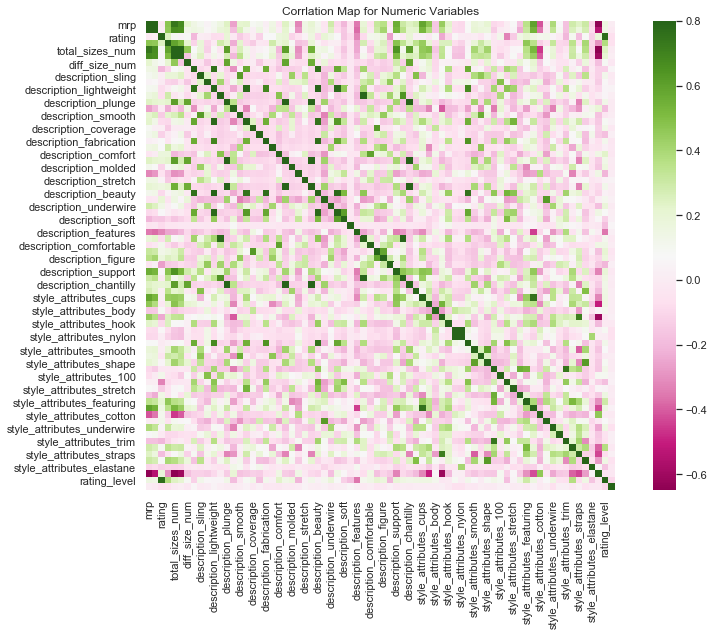

In [40]:
# plots a correlation plot
fig = plt.figure(figsize=(40,40))
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG") # creates a heatmap using the correlation matrix
plt.title('Corrlation Map for Numeric Variables')
plt.tight_layout()
plt.show()

## 3.1 For numerical variables

In [41]:
# Extracts the numerical values
num_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))

# create the numeric table
df_num = df[num_var]
df_num.shape

(31612, 72)

## 3.2 For character variables
### 3.2.1 Brandname

In [42]:
#check the brands again
brand_count = df.groupby('brand_name')['ID'].count().sort_values(0, ascending = False)
brand_count

brand_name
Wacoal              20096
Calvin-Klein         7373
b-temptd             3494
Hanky-Panky           582
Victorias-Secret       67
Name: ID, dtype: int64

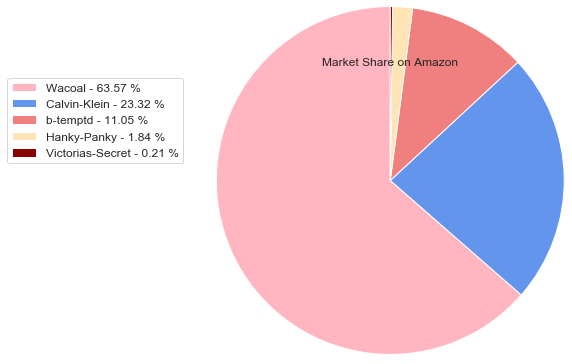

In [43]:
#pie chart - check the market share for the 5 brands on Amazon
fig1, ax1 = plt.subplots()
x = list(df['brand_name'].value_counts().index)
y = np.array(df['brand_name'].value_counts())
colors = ['lightpink','CornflowerBlue','lightcoral','Moccasin','Darkred']
explode = (0, 0, 0.1, 0, 0)
porcent = 100.*y/y.sum()
ax1.axis('equal') 
plt.title('Market Share on Amazon',loc = 'center')

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

plt.savefig('piechart.png', bbox_inches='tight')

plt.show()

### 3.2.2 Product type

In [44]:
#check the categories of the products
prod_count = df.groupby('Panties')['ID'].count().sort_values(0, ascending = False)
prod_count

Panties
0    26863
1     4749
Name: ID, dtype: int64

In [45]:
# check the categories of the products by brand
df.groupby(['brand_name','Panties'])['ID'].count()

brand_name        Panties
Calvin-Klein      0           4469
                  1           2904
Hanky-Panky       1            582
Victorias-Secret  0             67
Wacoal            0          19234
                  1            862
b-temptd          0           3093
                  1            401
Name: ID, dtype: int64

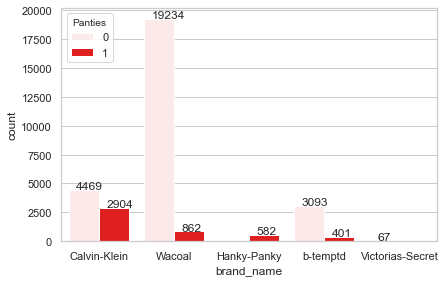

In [206]:
sns.set(style="whitegrid") 
# Plots the data on a bar chart and displays it


ax = sns.countplot(x='brand_name', hue = 'Panties', data = df,
                  color = 'red') 


for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

## Part 4. K-Means Clustering
### 4.1 Create dummy variables for brand name

In [207]:
# Create dummy variables using onehot encoding
dummy_brand_name = pd.get_dummies(df['brand_name'], drop_first=False) 

# Drops categorical variables from the df
df = df.drop('brand_name', axis = 1) 

# Adds the newly created dummy variables instead
df = pd.concat([df, dummy_brand_name], axis = 1) 

df.to_csv('new_Amazon.csv', index = False)

### 4.3 Scale the dataset

In [208]:
from sklearn import preprocessing

X = df.copy() # copy the normalized_df and save it to a variable named X

X = X.drop(['ID','rating_level'], axis = 1) 

X = pd.DataFrame(preprocessing.scale(X)) #Scale the dataset

X.columns = list(set(df.columns)-set(['ID','rating_level']))

### 4.3 Choose the optimized number of clusters

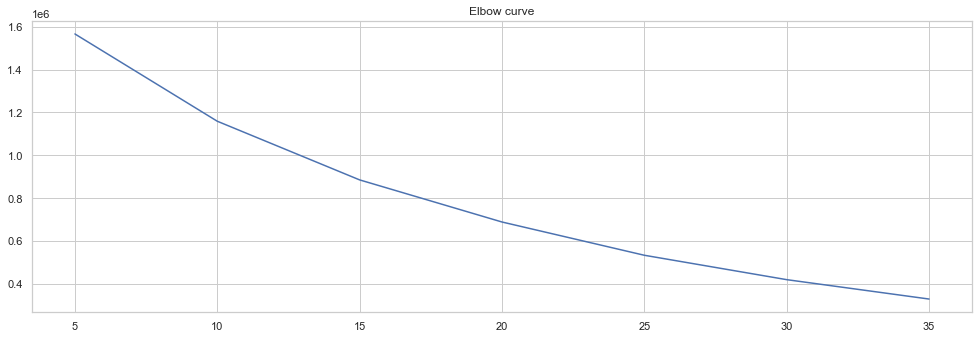

In [209]:
from sklearn.cluster import KMeans

distorsions = [] # create an empty list named distorsions

for k in range(5,40,5): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(5,40,5), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve') # title the plot

plt.show()
# This curve helps us determine the number of clusters (somehow optimally)



## 4.3 Fit the model and get information for each group

In [210]:
## Fit K-means
model = KMeans(n_clusters = 15) # appears that 15 is the optimal number of classes

model.fit(X) # fits the model

labels = model.labels_ #extracts the class labels

X['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
X['optimum_clusters'].value_counts()

group_weight = X.groupby('optimum_clusters').mean()

group_weight.to_csv('group_weight.csv', index = False)

# Part 5. Build Models

## 5.1 Balancing the Dataset

In [211]:
# computes the levels in the target variable 
df['rating_level'].value_counts() 
# (counting the number of 1 and 0)

1    26793
0     4819
Name: rating_level, dtype: int64

In [212]:
# check if there is still object variables
df.dtypes[df.dtypes =='object']

Series([], dtype: object)

In [213]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) # using the smote technique 
# (somehow oversampling) to balance the data

input_var = list(set(df.columns) - set(['rating_level'])) # sets the input var

X, Y = os.fit_sample(df[input_var], df['rating_level']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # makes the X array as a dataframe
Y = pd.DataFrame(Y, columns = ['rating_level']) # makes the Y array as a dataframe

df = pd.concat([X, Y], axis=1) # Combine X and Y

In [214]:
df['rating_level'].value_counts()

1    26793
0    26793
Name: rating_level, dtype: int64

## 5.2 Regression Models

In [215]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [216]:
# input_var = columns EXCEPT rating_level, rating, ID， color, product_name
input_var = [column for column in list(df.columns) if column not in ['rating_level', 'rating', 'ID']]

_X = pd.DataFrame(df[input_var], columns = input_var) # makes the X array as a dataframe
_Y = pd.DataFrame(df['rating_level'], columns = ['rating_level']) # makes the Y array as a dataframe

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(_X, _Y, test_size=0.3, random_state=42)

In [217]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

### 5.2.1 Linear Regression

#### Build model 

In [218]:
target = 'rating'

input_col = list(set(df.columns) - set(['rating']) - set(['rating_level']) - set(['ID']))  

model = LinearRegression() # creates a linear regression instance

model.fit(df[input_col], df[target]) 

# prints the model coefficients
print('Model coefficients:') 
print(model.coef_)
print(model)

print('\n')

print('R2 value: ' + str(round(100*model.score(df[input_col], 
                                               df[target]), 2)))   #R square value
print('\n')

# get the coefficienct in a dataframe
linear_coef = pd.DataFrame(model.coef_).T
linear_coef.columns = input_col
linear_coef.to_csv('linear_coef.csv',index = False)

Model coefficients:
[-1.80721629e-01 -4.25782968e-02 -1.10961288e-01  8.32143147e-01
  1.95616840e-01 -1.23969686e-01  2.76757520e-02  3.18707651e-04
 -1.22720864e-01 -7.66786554e-02 -7.70087933e-02 -2.45215034e-04
 -2.62848348e-01  2.00503688e-01  2.40954739e-01  2.28222848e-02
 -7.70087933e-02 -2.66676376e-02  1.24904073e-01  5.81746622e-02
 -7.70087933e-02 -4.34072693e-02  3.52630732e-02  8.74437268e-02
  9.74068691e-02  8.79320074e-03 -3.76071527e-01  1.71178438e-01
 -4.66892660e-02  6.41855171e-02  5.23302531e-02 -1.63258546e-01
 -4.16096728e-01  1.66961578e-01  3.53160405e-02  2.45404397e-03
  4.55338317e-01  3.74873495e-02  1.38084716e-01  5.73709608e-03
 -2.66945494e-03 -3.21987296e-02 -1.03948209e-01  2.13943327e-01
 -2.76212112e-02 -2.94275617e-01  2.41020977e-01  2.51635364e-02
  1.76539750e-01 -1.76848201e-01  6.79321460e-02  3.87351076e-02
  1.86354843e-01 -9.43171758e-02  1.54801772e-02  6.22342370e-03
 -7.83547825e-02 -1.00814954e-01 -5.25971863e-03  1.68663002e-01
 -8.8

#### Make a prediction

In [219]:
# Builds a new dataframe that will contain the actual target values
# predicted target values variables
# and Error (Residuals) (Actual - Target)
# Note that the higher the error the worse the model
# Higher the R2, better the model

pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = df[target]
pred_vs_actual['predicted'] = np.round(model.predict(df[input_col]), 2)
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']
print(pred_vs_actual.head(10))

   actual  predicted  error
0     4.5       4.48   0.02
1     4.4       4.31   0.09
2     4.3       4.22   0.08
3     4.4       4.40   0.00
4     4.4       4.31   0.09
5     4.2       4.21  -0.01
6     4.2       4.04   0.16
7     4.7       4.25   0.45
8     4.7       4.20   0.50
9     4.2       4.21  -0.01


#### Assesing the model

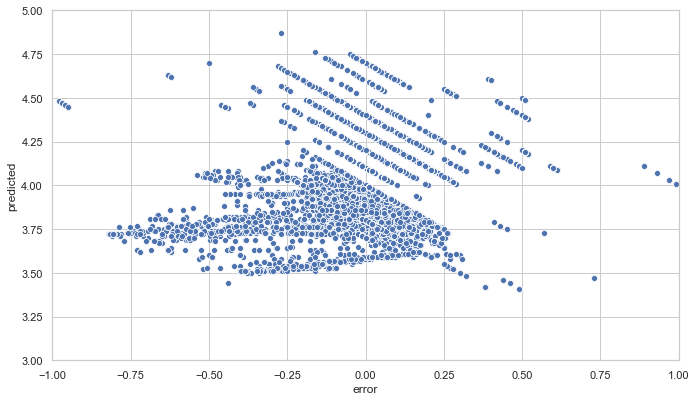

In [220]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize=(10,6)) # Determines the figure size
ax = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual) 
#plots the error vs. predicted
limits = ax.set(xlim=(-1.0, 1.0), ylim=(3, 5)) 
plt.show()

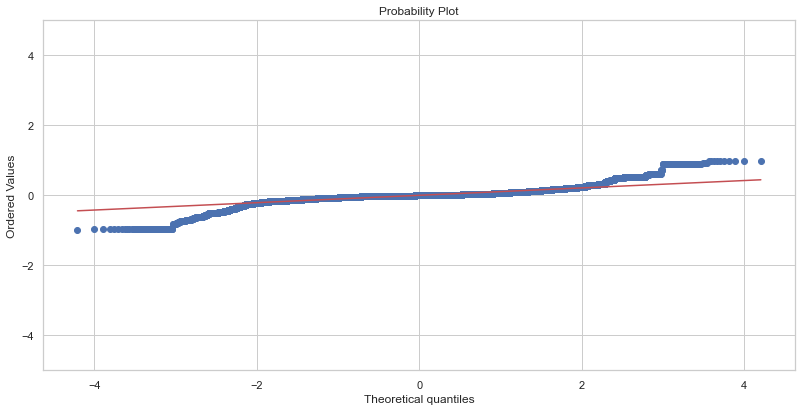

In [221]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size

_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True)  

limits = ax.set(ylim=(-5, 5)) 
plt.show()

### 5.2.2 Logistic Regression
#### 5.2.2.1 For all variables
#### Build model

In [222]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto') #'ovr' binary
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Assesing model

In [223]:
# make a prediction
pred_Y_lr = lr.predict(X_test)

# get the performance of the model
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

In [224]:
perf = pd.DataFrame([accuracy_lr], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression'])

perf['sensitivity'] = np.asarray([sensitivity_lr])

perf['specificity'] = np.asarray([specificity_lr])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.978726,0.97962,0.97783


#### Get ROC plot

In [225]:
from sklearn.metrics import roc_curve, auc

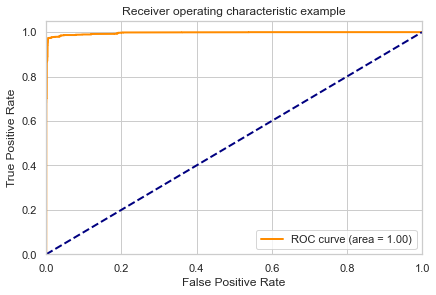

In [226]:
score_Y_lr = lr.predict_proba(X_test)  ##probability
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### 5-fold cross validation

In [227]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, Y_train)
clf.predict(X_test)
clf.predict_proba(X_test).shape
clf.score(X_train, Y_train)

0.9950679818715009

#### 5.2.2.2 For selected variables
#### Feature selection

In [228]:
# feature selection
from sklearn.feature_selection import SelectFromModel

smf = SelectFromModel(lr, threshold=-np.inf, max_features = 10) #select the variables in the logistic regression

smf.fit(X_train,Y_train) #fit the model

feature_idx = smf.get_support() #get true or false showing that if the variables are selected

selected_variables = [input_col[i] for i in range (0,len(input_col))  if feature_idx[i]] #get the name of seleted variables

selected_variables

['description_comfort',
 'description_underwire',
 'style_attributes_bra',
 'style_attributes_strap',
 'description_fabrication',
 'description_soft',
 'Wacoal',
 'style_attributes_back',
 'description_full',
 'description_coverage']

#### Using the selected 10 variables to build the regression model again.
#### Split data

In [229]:
#split the dataset again
input_var2 = selected_variables
_X2 = pd.DataFrame(df[input_var2], columns = input_var2) # makes the X array as a dataframe
_Y2 = pd.DataFrame(df['rating_level'], columns = ['rating_level']) # makes the Y array as a dataframe

from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(_X2, _Y2, test_size=0.3, random_state=42)

In [230]:
X_test2.shape

(16076, 10)

#### Build and access the model

In [231]:
#build the model again
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto') #'ovr' binary
lr.fit(X_train2, Y_train2)

# make a prediction
pred_Y_lr = lr.predict(X_test2)

# get the performance of the model
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test2, pred_Y_lr)

perf = pd.DataFrame([accuracy_lr], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression 2'])

perf['sensitivity'] = np.asarray([sensitivity_lr])

perf['specificity'] = np.asarray([specificity_lr])

perf

,accuracy,sensitivity,specificity
Logistic Regression 2,0.918947,0.945321,0.892515


#### Get ROC plot

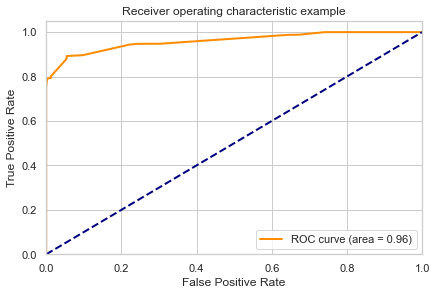

In [232]:
score_Y_lr = lr.predict_proba(X_test2)  #probability
fpr, tpr, _ = roc_curve(Y_test2, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

sns.set(style = 'whitegrid')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### 5-fold cross validation

In [233]:
from sklearn.linear_model import LogisticRegressionCV
clf2 = LogisticRegressionCV(cv=5, random_state=0).fit(X_train2, Y_train2)
clf2.predict(X_test2)
clf2.predict_proba(X_test2).shape
clf2.score(X_train2, Y_train2)

0.9214076246334311

### 5.2.3 Decision Trees

#### Build model, try all variables and 10 selected variables, leave one. ( 10 selected variables )

In [234]:
accuracy_dt = []
sensitivity_dt = []
specificity_dt = []
index_dt = []
d_value_dt = []
i_dt = 1
index_dt = []
for d in ([3, 4, 5, 6, 7, 8,9, 10, 12,  14, 15, 30, 50]):
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=d)
    dt.fit(X_train2, Y_train2)
    pred_Y_dt = dt.predict(X_test2) 
    accuracy,sensitivity,specificity = get_performance(Y_test2, pred_Y_dt)
    accuracy_dt.append(accuracy)
    sensitivity_dt.append(sensitivity)
    specificity_dt.append(specificity)
    index_dt.append('DT' + '-' + str(i_dt))
    d_value_dt.append(d)
    i_dt=i_dt+1


#### Accessing model

In [235]:
perf_dt = pd.DataFrame(accuracy_dt, columns = ['accuracy'], index = index_dt)

perf_dt['sensitivity'] = np.asarray(sensitivity_dt)

perf_dt['specificity'] = np.asarray(specificity_dt)

perf_dt["d"] = np.asarray(d_value_dt) 

perf_dt

,accuracy,sensitivity,specificity,d
DT-1,0.870117,0.993662,0.746295,3
DT-2,0.903085,0.949919,0.856146,4
DT-3,0.906631,0.948179,0.864989,5
DT-4,0.922742,0.953647,0.891767,6
DT-5,0.922742,0.953647,0.891767,7
DT-6,0.922742,0.953647,0.891767,8
DT-7,0.922742,0.953647,0.891767,9
DT-8,0.922742,0.953647,0.891767,10
DT-9,0.922742,0.953647,0.891767,12
DT-10,0.922742,0.953647,0.891767,14


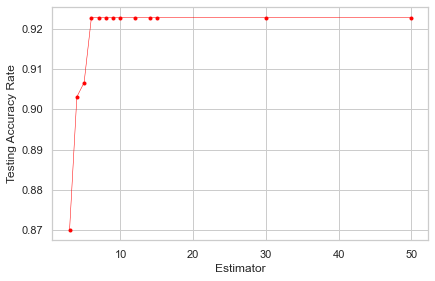

In [236]:
sns.set(style = 'whitegrid')
plt.plot(perf_dt.d,perf_dt.accuracy, color = "red", marker = ".", linewidth = 0.5)
plt.xlabel("Estimator")
plt.ylabel("Testing Accuracy Rate")
plt.style.use("fivethirtyeight")
plt.show()

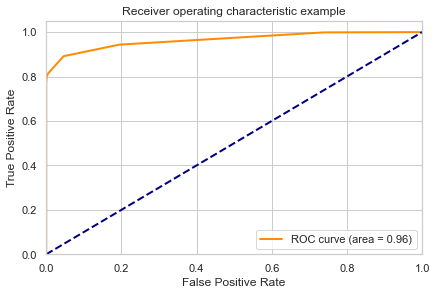

In [237]:
d = 7
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=d)
dt.fit(X_train2, Y_train2)
score_Y_dt = dt.predict_proba(X_test2) 

fpr, tpr, _ = roc_curve(Y_test2, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

sns.set(style = 'whitegrid')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 5.2.4 Random Forest

#### Build model with all variables and 10 selected variables. ( all variables, since we get the same accuracy no matter what the value of n_estimators in the 10 selected variables  model. )

In [238]:
accuracy_rf = []
sensitivity_rf = []
specificity_rf = []
index_rf = []
k_value_rf = []
i_rf = 1
index_rf = []
for e in range(10,500,20):
    rf = RandomForestClassifier(n_estimators= e, max_depth=9, random_state=0)
    rf.fit(X_train, Y_train.values.ravel())
    pred_Y_rf = rf.predict(X_test)
    accuracy,sensitivity,specificity = get_performance(Y_test, pred_Y_rf)
    accuracy_rf.append(accuracy)
    sensitivity_rf.append(sensitivity)
    specificity_rf.append(specificity)
    index_rf.append('RF' + '-' + str(i_rf))
    k_value_rf.append(e)
    i_rf=i_rf+1

#### Accessing model

In [239]:
# Builds a dataframe using the performance indicators so that we can compare the models easily
perf_rf = pd.DataFrame(accuracy_rf, columns = ['accuracy'], index = index_rf)

perf_rf['sensitivity'] = np.asarray(sensitivity_rf)
                                 

perf_rf['specificity'] = np.asarray(specificity_rf)
                                  
                                  
perf_rf["e"] = np.asarray(k_value_rf) 

perf_rf

,accuracy,sensitivity,specificity,e
RF-1,0.988865,0.997018,0.980695,10
RF-2,0.989052,0.998509,0.979574,30
RF-3,0.989985,0.999130,0.980820,50
RF-4,0.990421,1.000000,0.980820,70
RF-5,0.991851,0.999751,0.983933,90
RF-6,0.993469,0.999751,0.987172,110
RF-7,0.993780,0.999751,0.987794,130
RF-8,0.993717,1.000000,0.987421,150
RF-9,0.993842,1.000000,0.987670,170
RF-10,0.993780,1.000000,0.987545,190


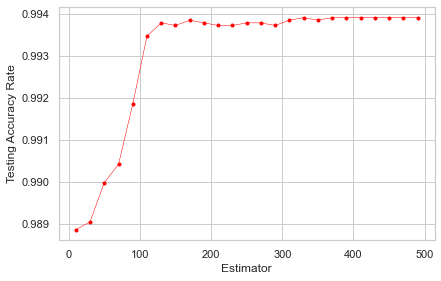

In [240]:
sns.set(style = 'whitegrid')
plt.plot(perf_rf.e,perf_rf.accuracy, color = "red", marker = ".", linewidth = 0.5)
plt.xlabel("Estimator")
plt.ylabel("Testing Accuracy Rate")
plt.style.use("fivethirtyeight")
plt.show()

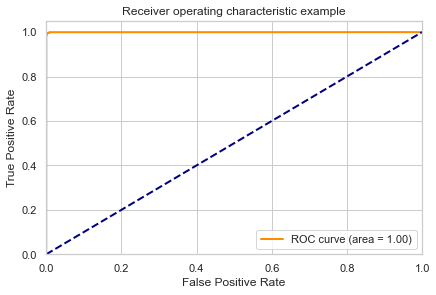

In [241]:
e = 150
rf = RandomForestClassifier(n_estimators= e, max_depth=9, random_state=0)
rf.fit(X_train, Y_train.values.ravel())
score_Y_rf = rf.predict_proba(X_test) 

fpr, tpr, _ = roc_curve(Y_test, score_Y_rf[:,1])
roc_auc = auc(fpr, tpr)

sns.set(style = 'whitegrid')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 5.2.5 K-Nearest Neighbors

#### Build model with all variables and 10 selected variables. ( all variables )

In [242]:
accuracy_knn = []
sensitivity_knn = []
specificity_knn = []
index_knn = []
k_value_knn = []
i_knn = 1
for k in range (2,1000,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train.values.ravel())
    pred_Y_knn = knn.predict(X_test)
    accuracy,sensitivity,specificity = get_performance(Y_test, pred_Y_knn)
    accuracy_knn.append(accuracy)
    sensitivity_knn.append(sensitivity)
    specificity_knn.append(specificity)
    
    index_knn.append('KNN' + '-' + str(i_knn))
    k_value_knn.append(k)
    i_knn=i_knn+1

#### Accessing model

In [243]:
# Builds a dataframe using the performance indicators so that we can compare the models easily
perf_knn = pd.DataFrame(accuracy_knn, columns = ['accuracy'], index = index_knn)

perf_knn['sensitivity'] = np.asarray(sensitivity_knn)
                                 

perf_knn['specificity'] = np.asarray(specificity_knn)
                                  
                                  
perf_knn["k"] = np.asarray(k_value_knn) 

perf_knn

,accuracy,sensitivity,specificity,k
KNN-1,0.998072,0.998882,0.997260,2
KNN-2,0.978042,0.977880,0.978204,52
KNN-3,0.969706,0.972661,0.966746,102
KNN-4,0.962428,0.971666,0.953170,152
KNN-5,0.956892,0.967441,0.946320,202
KNN-6,0.956706,0.968435,0.944950,252
KNN-7,0.950858,0.972039,0.929630,302
KNN-8,0.948743,0.974028,0.923403,352
KNN-9,0.947188,0.974773,0.919542,402
KNN-10,0.945322,0.975519,0.915058,452


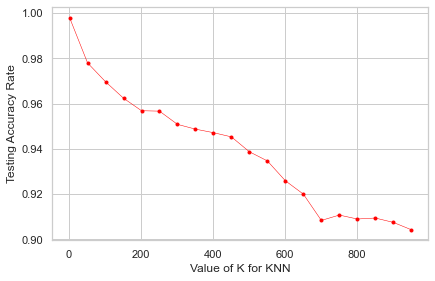

In [244]:
sns.set(style = 'whitegrid')
plt.plot(perf_knn.k,perf_knn.accuracy, color = "red", marker = ".", linewidth = 0.5)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy Rate")
plt.style.use("fivethirtyeight")
plt.show()

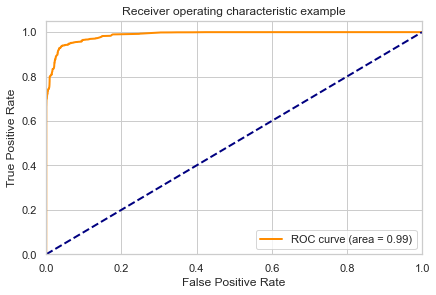

In [245]:
knn = KNeighborsClassifier(n_neighbors = 700)
knn.fit(X_train, Y_train.values.ravel())
score_Y_knn = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_knn[:,1])
roc_auc = auc(fpr, tpr)

sns.set(style = 'whitegrid')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Part 6. Comparision of models

In [246]:
perf_vs = perf
perf_vs = perf_vs.append(pd.DataFrame(perf_dt.iloc[4,:]).T)
perf_vs = perf_vs.append(pd.DataFrame(perf_rf.iloc[7,:]).T)
perf_vs = perf_vs.append(pd.DataFrame(perf_knn.iloc[14,:]).T)
perf_vs['sensi.*speci.'] = perf_vs['sensitivity'] * perf_vs['specificity']
perf_vs

,accuracy,sensitivity,specificity,d,e,k,sensi.*speci.
Logistic Regression 2,0.918947,0.945321,0.892515,NaN,NaN,NaN,0.843713
DT-5,0.922742,0.953647,0.891767,7.0,NaN,NaN,0.850432
RF-8,0.993717,1.000000,0.987421,NaN,150.0,NaN,0.987421
KNN-15,0.908373,0.979744,0.836841,NaN,NaN,702.0,0.819890
